In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/akanksha goel/OneDrive/Desktop/ml r/student_scores.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/akanksha goel/OneDrive/Desktop/ml r/student_scores.csv'

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Score')

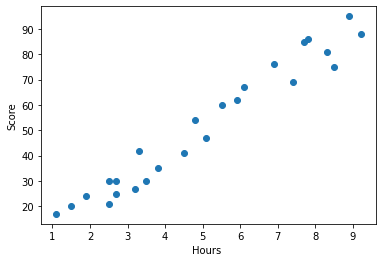

In [9]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours ")
plt.ylabel("Score")

In [10]:
x = df['Hours']
y = df['Scores']

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
xmean = np.mean(x)
ymean = np.mean(y)

In [21]:
n = len(x)
covar = (np.sum(x*y)-n*xmean*ymean)/n
var   = (np.sum(x*x)-n*xmean*xmean)/n
Q1 = covar/var
Q0 = ymean - xmean*Q1
print("Q1 :",Q1)
print("Q0 :",Q0)

Q1 : 9.775803390787473
Q0 : 2.4836734053731817


In [22]:
ypred = Q0 + Q1*x

In [25]:
print(ypred,y)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [27]:
def cost_func(y_original, y_predicted):     
    cost = np.sum((y_original-y_predicted)**2) / (len(y_original))
    return cost

In [46]:
def gradient_descent(X, Y, iters = 1000, lr = 0.0001,stopping_threshold = 1e-6) :
    initial_q1 = 0.1
    initial_q0 = 0.01
    iters = iters
    lr = lr
    n = float(len(X))
    prev_cost = None
    
    q1s = []
    q0s = []
    cost =[]
    for i in range(iters):
         
        y_pred = (initial_q1 * X) + initial_q0
        present_cost = cost_func(Y, y_pred)
        
        if prev_cost and abs(prev_cost - present_cost) <= stopping_threshold :
            break
         
        prev_cost = present_cost
     
        q0s.append(initial_q0)
        cost.append(present_cost)
        q1s.append(initial_q1)
         
        q1_der = (2/n) * sum(X * (y_pred-Y))
        q0_der = (2/n) * sum(y_pred-Y)
         
        initial_q1 = initial_q1 - (lr * q1_der)
        initial_q0 = initial_q0 - (lr * q0_der)
        
#         print("Iteration : ",i," :\t Qo = ",initial_q0,"\t Q1 = ",initial_q1)
            
    fig = plt.figure(figsize = (10,7))
    ax = fig.gca(projection='3d')   # Create the axes


    # syntax for 3-D plotting
    X, Y = np.meshgrid(q0s, q1s)
    plt.plot(X, Y, cost, color ='green')
    #     plt.plot(q1s, q0s)
#     plt.scatter(q1s, q0s, marker='o', color='red')
    plt.title("Qo,Q1 vs Cost")
    ax.set_xlabel("Q0s")
    ax.set_ylabel("Q1s")
    ax.set_zlabel("J(Q0,Q1)")
    plt.show()
     
    return initial_q1, initial_q0

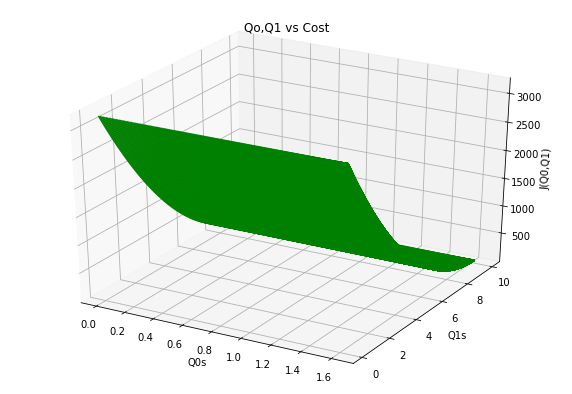

Optimal Q1 : 9.89805365782508
Optimal Qo : 1.6257353260421137


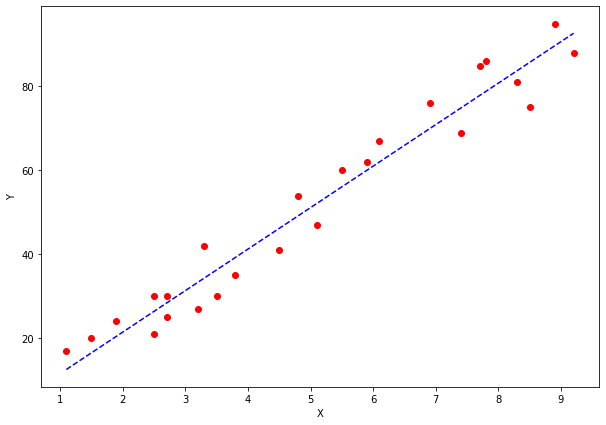

In [47]:
optimal_q1, optimal_q0 = gradient_descent(x, y)
print(f"Optimal Q1 : {optimal_q1}\nOptimal Qo : {optimal_q0}")

Y_pred = optimal_q1*x + optimal_q0

plt.figure(figsize = (10,7))
plt.scatter(x, y, marker='o', color='red')
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()